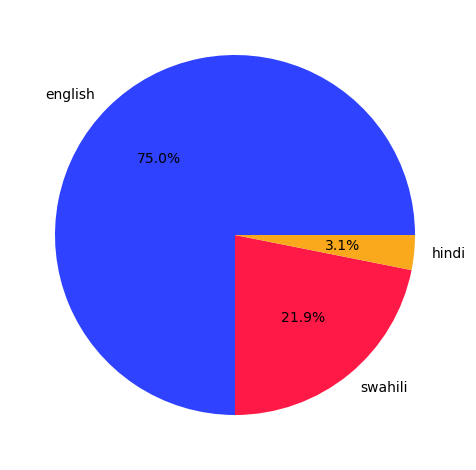

In [45]:
from code_data_science import data_table as dt, data_grid as moderne_data_grid
from code_data_science import palette as colors
import matplotlib.pyplot as plt
import plotly.express as px

#get data
df = dt.read_csv("../samples/comments_language.csv")
# Exit early if there are no rows and render a plot with a message
if len(df) == 0:
    fig = px.treemap(names=[], parents=[])
    fig.add_annotation(
        x=0.5, y=0.5, text="No rows of data found", showarrow=False, font=dict(size=20)
    )
else:

    lang_dict = {'ar': 'arabic', 'bg': 'bulgarian', 'de': 'german', 'el': 'modern greek', 
                 'en': 'english', 'es': 'spanish', 'fr': 'french', 'hi': 'hindi', 'it': 'italian', 
                 'ja': 'japanese', 'nl': 'dutch', 'pl': 'polish', 'pt': 'portuguese', 'ru': 'russian', 
                 'sw': 'swahili', 'th': 'thai', 'tr': 'turkish', 'ur': 'urdu', 'vi': 'vietnamese', 
                 'zh': 'chinese'}
    
    df["language"] = df["language"].apply(lambda lang: lang_dict[lang]) 
    #get counts of each language
    language_counts = dict(df["language"].value_counts())

    # plot
    fig, ax = plt.subplots()
    ax.pie(language_counts.values(), labels=language_counts.keys(),  colors=colors.qualitative(), frame=False, autopct='%1.1f%%')
    plt.axis('off')
    plt.tight_layout()
    plt.show()


